In [1]:
from IPython.core.display import HTML, display
HTML("""
<style>
svg {
    width:40% !important;
    height:40% !important;
}

.container { 
    width:100% !important;
}
</style>
""")

In [2]:
# %autosave 0
%config IPCompleter.greedy=True

# Python-Chess Evaluierung

In diesem Notebook wird die "python-chess-library" as "chess core" Bibliothek evaluiert. Der "chess core" soll Funktionen zum Erstellen des Schachbretts, berechnen der erlaubten/möglichen Züge, pushen der Züge etc. bereitstellen.

Dabei wird jede notwendige Funktion getestet und dessen Realisierung dokumentiert. Alle notwendigen Funktionen sind folgend gelistet.

- Schachbrett erstellen
- Schachbrett als ASCII ausgeben
- Züge zum Schachbrett pushen 
- Erlaubte Züge berechnen
- Auf Schach / Schachmatt prüfen 
- Testen, ob Rochade, En Passant und weitere, ähnliche Züge als erlaubte Züge gelistet werden
- _(Optional)_ Schachbrett als SVG in JupyterNotebook ausgeben
- _(Optional)_ Möglichkeiten evaluieren, Schachbrett je nach Positionierungen eindeutig identifizierbar in CSV zu schreiben
	
Desweiteren werden folgende Aktionen / Berechnungen auf deren Umsetzbarkeit getestet, um heraus zu finden, was mit dieser speziellen Bibliothek nötig ist, um die Aktionen durchzuführen.

- Berechnen & Ausgeben erlaubter Züge für eine spezielle Figur
- Abwechselnder User & KI Input auf selben Board 
- Berechnen des Werts des Schachbretts und attackierter Figuren
- Speichern von Zügen / Entwicklung des Schachbretts mit Sieg/Niederlagen Kontext als csv Datei

## Vorraussetzungen

Folgend werden die allgemeinen Vorraussetzungen für die Verwendung und Installation der "python-chess-library" erläutert.

- Python 3
Da die zu verwendende Bibliothek auf Python 3 basiert muss diese Version auf dem auszuführende Computer vorhanden sein.
    - [macOS](https://wsvincent.com/install-python3-mac/)
    - [Linux](https://docs.python-guide.org/starting/install3/linux/)
    - [Win](https://realpython.com/installing-python/)
- Jupyter Notebooks
Damit die aufgeführten Scripts direkt im Browser ausgeführt werden können haben sich die Autoren dieser Arbeit darauf verständigt Jupyter Notebook zu nutzen. Dabei bietet diese Applikation den Vorteil, dass Code und Dokumente live geteilt werden können und der entwickelte Code sofort ausgeführt werden kann. Ebenfalls bietet Jupyter Notebook die Möglichkeit unter Anderem Daten zu visualisieren.
    - [Installationsanleitung](https://jupyter.org/install)
- "python-chess-library"
    - `pip install python-chess`

## Erstellen eines Schachbretts und ausgeben als ASCII

Zu Beginn muss die Python-Chess-Library eingebunden werden, die für den weiteren Verlauf der Evaluierung und Implementierung benötigt wird.

In [3]:
import chess

Das unten einzusehene Code Snippet zeigt, wie ein neues Schachbrett mit standardmäßigen Positionierungen der Figuren erstellt werden kann. Dies ist umzusetzen durch den Aufruf der _"chess.Board()"_ Funktion und das Speicherns der Rückgabe dieser Funktion in einer _board_ Variable.
Dieses _board_ beinhaltet die Positionierungen aller Figuren und kann mittels der python-eigenen _"print()"_ Funktion als ASCII Code ausgegeben werden, wie unten einzusehen ist.
Zuletzt wird noch die Möglichkeit aufgezeigt, die auf einem spezifizierten Feld befindliche Figur auszulesen. Dieses Feld wird dabei über das Datenfeld _"chess.B1"_ aufgerufen.

In [4]:
board = chess.Board()
    
print ("\nBoard:")
print (board)

print ("\nPiece at B1:")
print (board.piece_at(chess.B1))


Board:
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R

Piece at B1:
N


Dabei ist einzusehen, dass die Figuren abgekürzt durch einen Buchstaben ausgegeben werden. Figuren des ersten Spielers werden als Kleinbuchstaben dargestellt, Figuren des zweiten Spielers als äquivalente Großbuchstaben. Leere Felder werden mit einem Punkt dargestellt. Folgender Liste kann die Zurodnung der Buchstaben zu den Schachfiguren entnommen werden:

- p/P: Pawn / Bauer
- r/R: Rook / Turm
- n/N: Knight / Springer
- b/B: Bishop / Läufer
- q/Q: Queen / Dame
- k/K: King / König

Die Zuordnung der Felder findet mittels einer Kombination aus einem Buchstabe und einer Zahl statt. Die Buchstaben A-H geben dabei die horizontale Reihe an, die Zahlen 1-8 die vertikalen Reihen. Jedem Feld wird eine namensäquivalente Variable in der statischen Klasse "chess" zugeordnet, wie beispielhaft Zeile 16 aus oberen Code Snippet entnommen werden kann

## Abwechselnder User & KI Input und pushen der Züge

Damit ein Schachspiel zustande kommen kann, ist es zwingend erforderlich, dass Nutzer und KI abwechselnd Züge auswählen und zum Board "pushen" können. Dafür muss zunächst überprüft werden, welcher Spieler an der Reihe ist, und dieser muss einen Zug auswählen können, welcher dann von dem Schachbrett übernommen wird. Auf diesem Schachbrett kann dann der nächste Spieler seinen Zug auswählen.

Bei der _"python-chess"_ Bibliothek kann der zu agierende Spieler über die _"board.turn"_ Variable ermittelt werden. Diese steht auf _True_ wenn Spieler 1 an der Reihe ist und auf _False_ wenn Spieler 2 den nächsten Zug machen muss. Beim Ausführen einer _push_ Operation auf dem _board_, um auf diesem einen Zug durchzuführen, wechselt die Variable automatisch ihren Wert.

Damit das Spiel erkennt, wenn dieses vorbei ist, bietet die Bibliothek die _"board.is_game_over()"_ Funktion. Diese gibt den Wert _True_ zurück, falls das Spiel auf Grund eines Schachmatts oder anderer spielbeendender Umstände vorbei ist.

Um alle möglichen Züge ausgeben zu können, bietet die _"python-chess"_ Bibliothek die Funktion _"board.legal_moves". Diese gibt alle gültigen Züge nach _chess960_ Standard aus. Dabei werden nur die Züge ausgegeben, die zum Einen vom aktuellen Schachbrett aus durchführbar sind und zum Anderen nicht zu einer unmittelbaren Niederlage führen. Das bedeutet, dass bei den legalen Zügen keine Züge ausgegeben werden, bei der sich der Spieler beispielsweise selbst in "Schach" stellt oder ein durch den Gegner verursachtes "Schach" ignoriert. Mittels der "_board.uci()"_ Funktion können diese in die leserlichere Form gebracht werden, die aus 4 Zeichen besteht. Die ersten beiden Zeichen stellen dabei das startende Feld dar, während die zweiten zwei Zeichen das Feld darstellen, auf das sich die Figur vom Startfeld bewegt.

Diese Funktion kann beim Zug des Nutzers genutzt werden, um diesem eine einfachere Übersicht über seine Möglichkeiten zu geben und den Zug in einer ihn verständlichen Form einzulesen. 

Mittels der _"list()"_ Funktion können die legalen Züge zu einer Liste zusammengefasst werden.

Im folgenden Beispiel sind alle notwendigen Schritte für ein Schachspiel zwischen Nutzer und KI erkennbar. Die KI ermittelt dabei ihren Zug durch eine zufällige Auswahl aus der Liste aller legalen Züge. Dabei wurden die einzelnen Methoden wie oben beschrieben implementiert und genutzt.

Zusätzlich müssen einigen Funktionen der Python-Chess-Library importiert werden, die für die Visualisierung eines Schachbretts als SVG benötigt werden. Ebenfalls wird das Modul _random_ eingebunden, da es für die Berechnung zufälliger Züge benötigt wird.

In [5]:
import chess.svg
import random
board = chess.Board()

`get_random_move` wählt zufällig einen Zug aus den erlaubten Zügen aus und gibt diesen mit dem Type CHESS.Move zurück. Hingegen wird die Funktion `get_legal_moves_uci` genutzt um die erlaubten Züge berechnen zu lassen.

In [6]:
def get_random_move():
    return random.choice(list(board.legal_moves))

def get_legal_moves_uci():
    return list(map(board.uci, board.legal_moves))

Die Funktion `get_user_move` wird verwendet um den Nutzer die möglichen, bzw. erlaubten Züge auszugeben. Dabei wird die zuvor eingeführte Funktion zur Berechnung von legalen Zügen verwendet.

In [7]:
def get_user_move():
    print("Possible Moves: ")
    print(get_legal_moves_uci())
    
    print("Enter your move:")
    move = input()
        
    return chess.Move.from_uci(move)

Der folgende Codeausschnitt wird genutzt um einen Nutzer gegen den Computer spielen zu lassen, der jeweils einen zufälligen Zug verwendet. Hierbei wird für das Jupyter Notebook ein Counter eingeführt, damit das Spiel bereits nach zwei Zügen pro Spieler beendet ist. Alternativ dazu wird das Spiel beendet, sobald ein Sieger oder ein Patt feststeht.

Ebenfalls wird als Unterstützung für den Spieler pro Zug das Schachbrett und die legalen Züge ausgegeben.

In [8]:
counter = 0
while (not board.is_game_over() and counter < 4):
    print("---------------")
    print(board)
    print("---------------")
    print()
    
    if board.turn:
        board.push(get_user_move())
        print("Your Move: ")
    else:
        board.push(get_random_move())
        print("AIs Move:")
        
    counter+=1
    
print(board)
print("[...]")

---------------
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
---------------

Possible Moves: 
['g1h3', 'g1f3', 'b1c3', 'b1a3', 'h2h3', 'g2g3', 'f2f3', 'e2e3', 'd2d3', 'c2c3', 'b2b3', 'a2a3', 'h2h4', 'g2g4', 'f2f4', 'e2e4', 'd2d4', 'c2c4', 'b2b4', 'a2a4']
Enter your move:
g1h3
Your Move: 
---------------
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
---------------

AIs Move:
---------------
r n b q k b n r
p p p . p p p p
. . . p . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . N
P P P P P P P P
R N B Q K B . R
---------------

Possible Moves: 
['h3g5', 'h3f4', 'h3g1', 'h1g1', 'b1c3', 'b1a3', 'g2g3', 'f2f3', 'e2e3', 'd2d3', 'c2c3', 'b2b3', 'a2a3', 'g2g4', 'f2f4', 'e2e4', 'd2d4', 'c2c4', 'b2b4', 'a2a4']
Enter your move:
h3g5
Your Move: 
---------------
r n b q k b n r
p p p . p p p p
. . . p . . . .
. . . . . . N .
. .

## Ausgeben des Boards als SVG

Um eine bessere Darstellung und Erklärung der Implementation in der theoretischen Ausarbeitung zu ermöglichen, wäre eine visuelle Darstellung des Schachbretts wünschenswert. Die "python-chess-library" ermöglicht dieses durch ein Konvertieren des Board zu einer SVG Datei. Diese kann dann mittels der python-eigenen _"SVG()"_ Funktion im Python-Notebook angezeigt werden, wie im unteren code-snippet einsehbar ist.

Um dies zu ermöglichen, muss zunächst die SVG library aus _"IPython"_ importiert werden. Anschließend kann das Board über die _"chess.svg.board()"_ Funktion konvertiert und anschließend als SVG ausgegeben werden.

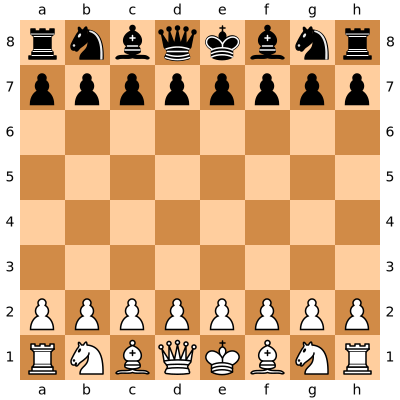

In [9]:
from IPython.display import SVG

board = chess.Board()
SVG(chess.svg.board(board=board)) 

Die verwendete Bibliothek bringt den Vorteil mit sich, dass einige wichtige Eigenschaften während eines Spiels visualisiert werden können. Ein Beispiel für diese Visualisierung ist das Schachmatt, bei dem der betroffende König rot hervorgehoben wird.

In diesem Beispiel wird eine bestimmte Situation während eines Schachspiels importiert, in der ein Schachmatt vorliegt, um diesen Fall simulieren zu können. Das Schachmatt auf der Position `E8` wird in diesem Codeausschnitt manuell, durch den Übergabeparamter `chess.E8`, hervorgehoben.

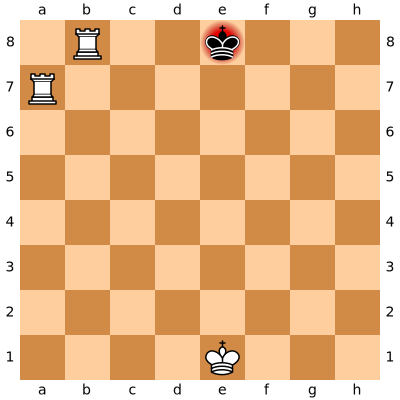

In [10]:
board = chess.Board("1R2k3/R7/8/8/8/8/8/4K3 b KQkq - 0 1")
SVG(chess.svg.board(board, check=chess.E8))

## Berechnen & Ausgeben legaler Züge eines speziellen Felds

Für eine bessere, visuelle Darstellung in der theoretischen Ausarbeitung wurde die Möglichkeit geprüft spezielle Felder auf dem ausgegebenen SVG markieren zu können. Solche Felder können beispielsweise die errechneten erlaubten Züge einer speziellen Figur / eines speziellen Felds darstellen, um anzuzeigen, was für Möglichkeiten eine Figur in der aktuellen Situation besitzt.

Dies kann realisiert werden, indem auf die legalen Züge zurückgegriffen wird und diese gefiltert werden. Bei dem verwendeten Filter müssen die Ausgangspositionen, die mit *"move.from_square"* ausgelesen werden können, mit dem eingegebenen Feld übereinstimmen. 

In [11]:
board = chess.Board()

print("Please enter field:")
field = input()

moves_from_spec_field = list(filter(lambda move: move.from_square is chess.SQUARE_NAMES.index(field), board.legal_moves))

Please enter field:
a2


Diese herausgefilterten Züge werden dann zu deren Zielfelder gemapped. Diese können mit der Funktion *"move.to_square"* ausgelsen werden.

In [12]:
square_nums = list(map(lambda move: move.to_square, moves_from_spec_field))

Nun kann man ein SquareSet erstellen und alle gefilterten Felder diesem hinzufügen. Das SquareSet kann dann beim Erstellen des Board mit angegeben werden. Dies veranlasst das Zeichnen von Kreuzen auf den berechneten Feldern, also auf denen, die von dem angegebenen Feld aus erreicht werden können.

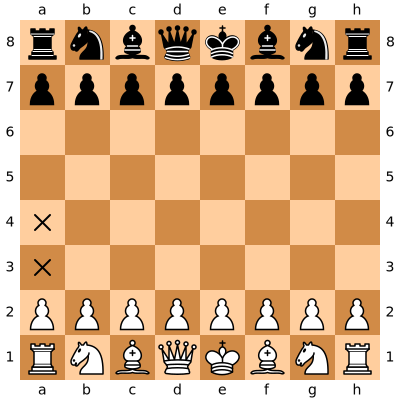

In [13]:
squares = chess.SquareSet()
for square_num in square_nums : squares.add(square_num)

SVG(chess.svg.board(board=board, squares=squares))

## Evaluieren des Schachbretts & Berechnen attackierter Figuren

Um mögliche Züge der KI bewerten zu können und so schlussendlich den besten Zug auszuwählen, müssen diese einen Wert zugewiesen bekommen, der Aussage über die Qualität des Zuges gibt. Dafür können unter anderem die Bewertung des Schachbretts durch Summieren zugewiesener Werte für alle lebenden Figuren oder das Berechnen und Einbeziehen attackierter Figuren zur Hilfe genommen werden.

Dabei ist zunächst jedem Figurentyp ein Wert zuzuweisen. Üblicherweise werden Bauern dabei 1 Punkt, Türmen 5 Punkte, Springern sowie Läufern jeweils 3 Punkte und der Dame 9 Punkte zugeordnet.

In [14]:
PAWN_VALUE = 1
ROOK_VALUE = 5
KNIGHT_VALUE = 3
BISHOP_VALUE = 3
QUEEN_VALUE = 9
KING_VALUE = 20

def assign_piece_value(piece_type):
    return {
        1: PAWN_VALUE,
        2: KNIGHT_VALUE,
        3: BISHOP_VALUE,
        4: ROOK_VALUE,
        5: QUEEN_VALUE,
        6: KING_VALUE
    }[piece_type]

Um den Wert des Schachbretts zu berechnen muss zunächst der Wert aller weißer Figuren berechnet werden und von diesem der Wert aller schwarzen Figuren abgezogen werden. Ist das Ergebnis positiv, so verläuft das Spiel günstig für den Spieler der weißen Figuren. Ist das Ergebnis negativ, so liegt der Spieler der schwarzen Figuren im Vorteil. Umso höher der Betrag des jeweiligen Spielers ist, desto mehr liegt dieser im Vorteil.

Damit die Werte der Spieler berechnet werden können, wird die Anzahl aller Figurentypen der jeweiligen Farbe berechnet und diese mit dem Wert der Figurentypen multipliziert. Am Ende werden die Ergebnisse für alle Figurentypen zusammengezählt und zurückgegeben.

In [15]:
def get_value_by_color(color):
    attacked_pieces_value = map(lambda piece_type : len(board.pieces(piece_type, color)) * assign_piece_value(piece_type), chess.PIECE_TYPES)
    return sum(attacked_pieces_value)

def get_board_value():
    white_value = get_value_by_color(chess.WHITE)
    black_value = get_value_by_color(chess.BLACK)
    
    return white_value - black_value

Die Berechnung der attackierten Figuren ist ähnlich zu dem Vorgehen beim Berechnen des Brettwerts. Dabei werden erst die Werte der vom weißen Spieler attackierten Figuren berechnet und davon die Werte der vom schwarzen Spieler attackierten Figuren abgezogen. Auch hierbei ist ein positive Ergebnis zum Vorteil des Spielers der weißen Figuren und ein negatives Ergebnis zum Vorteil des Spielers der schwarzen Figuren. Umso höher der Wert, desto deutlicher der Vorteil.

Um diese Werte der attackierten Figuren zu berechnen wird jedes Feld durchgegangen. Daraus werden die Felder gefiltert, die von einer Figur der Farbe des Verteidigers belegt sind und von einer Figur der angreifenden Farbe attackiert werden können. Anschließend wird zu diesen Feldern der Typ der Figur gemapped, die sich auf dem Feld befindet. Daraufhin werden diesen ihre jeweiligen Werte zugeordnet und diese abschließend summiert.

In [16]:
def get_attacked_pieces_value_by_color(attacker_color, defender_color):
    # filters squares for attacked squares, on which a figure of defender is placed
    attackedSquares = filter(lambda square : board.is_attacked_by(attacker_color, square) and not board.piece_at(square) is None and board.piece_at(square).color is defender_color, chess.SQUARES)
    # maps piece type to attacked figure
    attackedPieces = map(lambda square : board.piece_at(square).piece_type, attackedSquares)
    # maps piece value to attacked pieces
    value = map(assign_piece_value, attackedPieces)
    # sums piece value of all attacked pieces
    return sum(value)
     
def get_attacked_pieces_value():
    white_value = get_attacked_pieces_value_by_color(chess.WHITE, chess.BLACK)
    black_value = get_attacked_pieces_value_by_color(chess.BLACK, chess.WHITE)
    
    return white_value - black_value

Im folgenden Codeausschnitt wird ein Beispiel gegeben wie durch die Verwendung, der zuvor vorgestellten Funktionen, eine Auskunft über den akutellen Spielstand gegeben werden kann.

In [17]:
board = chess.Board()

board_value = get_board_value()
attacked_pieces_value = get_attacked_pieces_value()

# compute the player with a higher value of pieces
if board_value > 0:
    print("White held the lead ahead of Black")
elif board_value < 0:
    print("Black held the lead ahead of White")
else:
    print("Draw")
    
print("Value of the attacked pieces: ", attacked_pieces_value)

Draw
Value of the attacked pieces:  0


## Speicherung der einzelnen Spielzüge in history.csv

Um die KI Entscheidungen um ihre Spielzüge auch von vorherige Spielen und desse Ausgängen abhängig zu machen, muss eine Historie angelegt werde, die die Spielbretter und den Ausgang des Spiels im Nachgang beinhaltet. An Hand dieses kann die KI in zukünfigen Spielen dann den Wert des Spielbrettes abschätzen und so das Spielbrett evaluieren und besser zwischen allen möglichen, erreichbaren Spielbrettern entscheiden.

Zur Erweiterung der Liste wird zuerst das Modul Pandas genutzt, welches es ermöglicht Informationen als Datenbank in einer Variable zu speichern. Ebenso wird angegeben unter welchem Pfad sich die Zughistorie befinden soll.

In [131]:
import pandas as pd
HISTORY_FILE_LOC = "res/history.csv"

Dazu kann testweise ein Spiel durchgespielt werden, wobei jeder Zug zufällig aus der Liste der legalen Züge gewählt wird.

In [132]:
def get_random_move(board):
    return random.choice(list(board.legal_moves))

Nach jedem Zug wird das Spielbrett als "FEN" Darstellung einer Liste hinzugefügt. Die "FEN" Darstellung ist eine gekürzte Form der Darstellung des Spielbretts, wobei das Spielbrett dennoch eindeutig identifizierbar bleibt. Dabei wird neben dem aktuellen Spielbrett auch die Farbe der nächste zu spieleden Figur, die Anzahl der Züge beider Seite und weitere Informationen angegeben. Um diese aus der Darstellung zu kürzen, wird die auf die "FEN" Darstellung des Boards die _split_ Funktion angewandt und nur das erste Element aus der daraus entstehenden Liste gespeichert, da die einzelnen Merkmale in dieser Darstellung per Leerzeichen getrennt werden.

In [133]:
def play_random_chess_game(board):
    turn_list = list()
    while not board.is_game_over():
        turn_list.append(board.fen().split(" ")[0])
        board.push(get_random_move(board))
    return turn_list

Nach Ende des Spiels wird über der zu spielenden Farbe ermittelt, wer der Sieger des Spiels ist, und dementsprechend der Wert "+1" oder "-1" zurückgegeben. Mit diesem wird dann eine Key-Value Liste erstellt, die zu jedem Spielbrett des vergangenen Spiels den Wert zuweist, der Aussage über den Sieger gibt.

Diese Liste wird dann zusammen gefügt mit der bisher vorhandenen Historie. Falls bereits ein Eintrag für ein gleichartiges Schachbrett existiert, wird der Siegwert zu dem aktuellen Wert aus der Historie dazu addiert, andernfalls wird ein neuer Eintrag mit dem Siegwert angelegt.

In [134]:
def store_game(turn_list, victory_status):
    new_move_list = []
    old_turn_df = pd.read_csv(HISTORY_FILE_LOC)
    for move in turn_list:
        if not(move in old_turn_df.board):
            new_move_list.append(move) 
        else:
            print("new victory value")
            old_turn_df[move].value += 1
            victory_status += 1
    content = {"board": new_move_list,"value": victory_status}
    new_turn_df = pd.DataFrame(content, columns = ["board", "value"])
    merged_df = (old_turn_df.append(new_turn_df)).sort_values(by=['board'])
    merged_df.to_csv(HISTORY_FILE_LOC, header=True, encoding="utf-8",index=False)

Der Siegwert nach dem Schachbrett gibt dann je nach Höhe Aussage darüber, wie wahrscheinlich es ist mit einem solchen Schachbrett zu gewinnen. Umso höher der Wert in den positiven Bereich fällt, desto wahrscheinlicher ist ein Sieg für Spieler 1. Umso höher der Wert in den negative Bereich fällt, desto besser sind die Aussichten für Spieler 2.

Diese Erkenntnis kann dann von der KI genutzt werde, um beim "iterative Deepening" Prozess alle möglichen Schachbretter zu evaluiere und sich so für den besten Zug zu entscheiden.

Der folgende Code koordiniert die Abläufe der Funktionen um die Datei `history.csv` zu erweitern.

In [137]:
i = 0
while i < 1000:
    i += 1
    board = chess.Board()
    turn_list = play_random_chess_game(board)

    victory_status = 1 if board.turn else -1
    store_game(turn_list, victory_status)
    print(i)
    
print("finish")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Ein Ausschnitt aus der history.csv ist im folgenden Snippet zu sehen.

In [140]:
DF = pd.read_csv(HISTORY_FILE_LOC)
DF.head()

,board,value
0,1B1B2bn/8/6k1/8/8/4K3/B7/8,1
1,1B1B2kr/8/6b1/2n4p/2Ppp2b/3P1BP1/r2Rn3/2R1K3,-1
2,1B1B2kr/8/6b1/2n4p/r1PpP2b/5BP1/3Rn3/2R1K3,-1
3,1B1B2kr/8/6b1/2n4p/r1Ppp2b/3P1BP1/3Rn3/2R1K3,-1
4,1B1B3n/8/6k1/3b4/8/4K3/B7/8,1


Damit eingeschätzt werden kann, wie aussichtsreich ein bestimmter Boardzustand ist, kann ein gespeicherter Spielverlauf zur Hilfe genommen werden. Mit Hilfe der Funktion `compare_board_history` kann ein Erwartungswert berechnet werden. Umso höher der zurückgegebene Wert der Funktion, desto wahrscheinlicher ist ein Sieg für Weiß. Hingegen ist ein Sieg für Schwarz umso wahrscheinlicher, sobald der Wert deutlicher in den negative Bereich fällt.

Der Vorgang zur Berechnung dieses Wertes beginnt mit dem Einlesen der `history.csv` in ein Pandas Dataframe. Daraufhin wird durch die Reihe des Dataframes iteriert, die die Schachbretter in FEN-Schreibweise enthält. Sobald die aktuelle Spielsituation in der Historie gefunden wurde, wird deren Wert ausgelesen und zurückgegeben. Falls die aktuelle Spielsituation nicht vorhanden ist, wird der Wert `0` zurückgegeben.

In [54]:
def compare_board_history(board):
        df = pd.read_csv(HISTORY_FILE_LOC)
        row = df.loc[df['board'] == board.fen().split(" ")[0]]
        value = row['value'].item() if len(row['value']) == 1 else 0
        return value

## Überprüfung auf ein Schach oder Spielende

Damit der Spielverlauf korrekt nach den Regeln des Spiels abfolgen kann muss während jedes Zuges darauf geprüft werden, ob ein Schach, Schachmatt oder Patt vorliegt. Schach ist hierbei eine Stellung während des Spiels, bei dem der König in Bedrängnis geraten ist. Ein Schach kann im weiteren Verlauf zu einem Schachmatt werden. Hierbei liegt der Unterschied darin, dass der Spieler, der sich im Schachmatt befindet mit keinen regelkonformen Zügen sich aus dem Schachmatt befreien kann und somit das Spiel verloren hat. Steht der König Schach kann er mit einem gezielten Zug sich aus dieser Lage befreien. Ein Patt ist eine Endposition beim Schach, die die Eigenschaft hat, dass keiner der beiden Spieler ein Schachmatt erreichen kann.

Da ein Schachmatt oder Patt das Schachspiel beendet ist diese Prüfung ein essenzieller Aspekt der zu entwickelnden KI. Um diese Prüfung durchzuführen bietet die verwendete Bibliothek bereits einige Funktionen. Ebenso ist es wichtig zu überprüfen, ob ein Schach vorliegt, da der Spieler zuerst dies lösen muss, bevor er weiterspielen kann. 
Um diese Prüfung durchzuführen steht jeweils für die Überprüfung eines Schachs oder Spielendes eine Funktionen zur Verfügung, die das aktuelle Spiel auf diesen Aspekt überprüft. Um herauszufinden, ob es sich um ein Schach handelt, kann die folgende Funktion verwendet werden.
* `is_check()`
    * Überprüft die aktuellen Begebenheiten auf ein mögliches Schach
    
Hingegen gibt es die Funktion `is_game_over`, die die gespielten Züge auf jegliche Arten einer benötigten Beendigung des Spiels überprüft. Hierbei beinhaltet `is_game_over` einige Mögliche Überprüfungen auf Schachmatt oder Patt.
* `is_game_over()`
    * Stellt sicher, ob das Spiel auf Grund eines Schachmatts oder anderer spielbeendender Umstände vorbei ist 
    * Hierbei wird überprüft, ob ein Schachmatt (`is_checkmate()`), ein Patt (`is_stalemate()`), eine Tote Stellung (`is_insufficient_material()`), die 75-Züge-Regel (`is_seventyfive_moves()`), eine Figur fünf mal auf der gleichen Position sich befindet (`fivefold_repetition`), oder eine spezielle Endbedingung vorliegt.
    
Um herauszufinden, ob ein Spieler tatsächlich gewonnen hat kann eine Teilfunktion der zuvor genannten genutzt werden. Diese Funktion überprüft lediglich, ob ein Schachmatt vorliegt.
* `is_checkmate()`
    * Stellt fest, ob es sich nach den bereits gespielten Zügen ein Schachmatt vorliegt

In [55]:
# import situation where checkmate is True
board = chess.Board("r1bqkb1r/pppp1Qpp/2n2n2/4p3/2B1P3/8/PPPP1PPP/RNB1K1NR b KQkq - 0 4")

print("Check: ", board.is_check())
print("Checkmate: ", board.is_checkmate())
print("Game is over: ", board.is_game_over())

Check:  True
Checkmate:  True
Game is over:  True


Im folgenden wird ein Beispiel einer Spielsituation gezeigt, in der ein Schachmatt vorliegt und die auf Schach, Schachmatt und Spielende überprüft wurde.

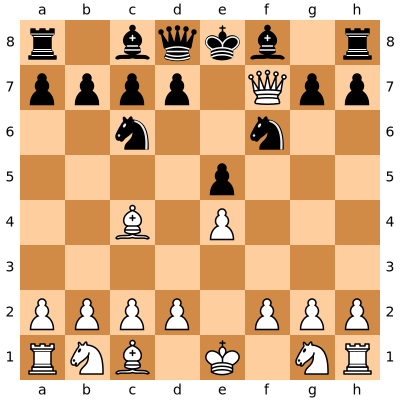

In [56]:
SVG(chess.svg.board(board=board))

## Überprüfung, ob "en passant" und "Rochaden" unterstützt werden
Im Schach gibt es einige spezielle Züge, die es ermöglichen eine Figur eine Aktion durchzuführen zu lassen, die normalerweise laut der grundlegenden Definition dieser nicht möglich ist.

Die Schachfigur eines Bauers darf normalerweise nur dann eine andere Figur schlagen, wenn sich diese direkt in dem diagonal vor dem Bauern angrenzenden Feld befindet. Durch die sogenannten Regel "en passant", im deutschen "im Vorbeigehen", wird diese Regel erweitert. Eingesetzt werden kann "en passant", wenn auf einen Bauern die Sonderregel des Doppelschritts aus der Grundstellung angewendet wird. Steht in diesem Fall der mit Doppelschritt herausgerückte Bauern neben einem des Gegeners, dann kann dieser den neu herausgerückten Bauern durch "en passant" schlagen. Hierbei springt der angreifende Bauer des Gegeners direkt hinter den herausgerückten und schlägt ihn somit.

Damit die Schach-KI alle möglichen Züge des Gegners bedenken und ebenso alle Züge ausführen soll, muss überprüft werden, ob die verwendete Library die beiden Sonderzüge unterstützt, oder ob diese Unterstützung manuell entwickelt werden muss.

In [57]:
# import situation where en passant is possible
board = chess.Board("rnbqkbnr/1pp1pppp/p7/3pP3/8/8/PPPP1PPP/RNBQKBNR w KQkq d6 0 3")

# the function board.has_legal_en_passant() could check if a en passant is possible, but does not return at which square
print("Library is supporting en passant: ",chess.Move.from_uci("e5d6") in board.legal_moves)

Library is supporting en passant:  True


Die Chess-Core Bibliothek unterstützt somit den Sonderzug en passent.

Im Folgenden wird ein Schachbrett angezeigt, bei dem es dem weißen Bauer (`e5`) möglich ist im Vorübergehen den schwarzen Bauer (`d5`) zu schlagen.

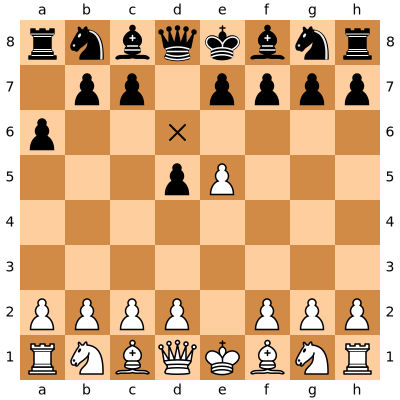

In [58]:
squares = chess.SquareSet([chess.D6])
chess.svg.board(board=board, squares=squares) 

Neben den en passant gibt es einen weiteren bekannten Sonderzug, die sogenannte Rochade. Bei der Rochade lassen sich die Positionen eines Turms und des Königs tauschen, wobei für diesen Vorgang nur ein Zug benötigt wird. Dabei ist zu beachten, dass die Vorraussetzung für diesen Zug ist, dass sowohl der zu verwendende Turm, als auch der König im Verlauf des Spiels nicht genutzt wurden. Ebenfalls dürfen die Felder zwischen König und Turm nicht belegt sein und keines der Felder, durch die der König ziehen muss, darf durch eine gegnerische Figur bedroht sein, sowie der König vor und nach der Rochade nicht im Schach steht

Für jeden Spieler gibt es zwei verschiedene Möglichkeiten der Rochade, einerseits die kurze, als auch die lange Rochade. Ein Beispiel für eine lange Rochade der weißen Figuren ist, dass der Turm (`a1`) und der König (`e1`) ihre Positionen tauschen und somit der Turm sich auf dem Feld `d1` und der König auf `c1` befindet.

Library is supporting castling: True


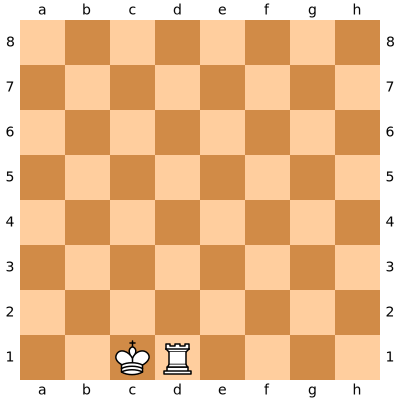

In [59]:
# import situation where castling is possible
board = chess.Board("8/8/8/8/8/8/8/R3K3 w KQkq - 0 1")
# shortcut for the castling-move with the queenside rook
castling = "O-O-O"

# check if castling is in the legal moves and print the result
if castling in str(board.legal_moves):
    print("Library is supporting castling: True")
    board.push_san(castling)
else:
    print("Library is supporting castling: False")

SVG(chess.svg.board(board=board)) 

Eine durchgeführte kurze weiße Rochade, bei der `a1` und `e1` die Positionen getauscht haben, sodass der König sich nun auf `c1` und der Turm auf `d1` befindet. Die Abkürzung für eine kurze Rochade ist _O-O_, das für den Turm auf der Seite des Königs steht und _O-O-O_ für eine lange Rochade, wobei die Abkürzung für den Turm auf der Seite der Dame steht.

## Einbinden eines Opening-Books  in die Chess AI
Polyglot ist ein Open-Source Format, in dem sogenannte Opening-Books erstellt werden können. Opening-Books sind Ansammlungen von Spielzügen, die im Schach zur Eröffnung genutzt werden können. Hierbei wird zum Einstieg des Spiels nicht auf eine Künstliche Intelligenz zurückgegriffen, sondern auf ein Verzeichnis von bereits bestehenden Zügen, die sich innerhalb dieses Opening-Books befinden. Der Vorteil eines Opening-Books liegt darin, dass bereits qualitativ hochwertige Strategien verfügbar sind und somit ein anspruchsvolles Spiel ermöglichen.

Sobald das Opening-Book, im Verlauf des Spiels, keinen passenden Zug als Antwort bereitstellen kann, übernimmt die Künstliche Intelligenz.

Für das Einbinden eines Opening-Books werden einige Funktionen aus der Core Chess Library genutzt und müssen somit eingebunden werden.

In [60]:
import chess.polyglot

Als nächstes wird ein neues Spiel/Board erzeugt, indem die Figuren standardmäßig angeordnet werden. Ebenfalls wird ein Opening-Book in eine Variable geladen, damit aus dieser der bestmöglichen Zug ausgewählt werden kann. Dies geschieht, indem das Opening-Book das aktuelle Board übergeben bekommt und anhand der Positionen der Figuren einen passenden Zug auswählt.

Der ausgewählte Zug wird als nächstes auf dem Schachbrett ausgeführt und somit wird in diesem Beispiel der weiße Bauer von `e2` nach `e4` gezogen.

Selected move with the highest weight:  e2e4
All available moves for this situation:  e2e4, d2d4, c2c4


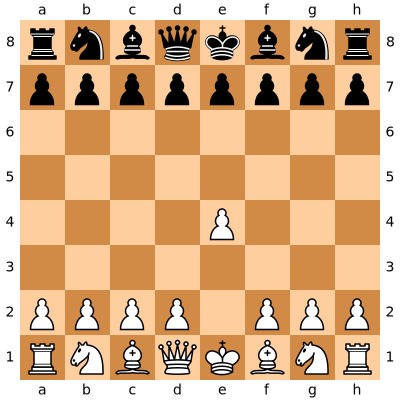

In [61]:
board = chess.Board()
book = chess.polyglot.open_reader("res/polyglot/Performance.bin")

# find the move with the highest weight for the current board
try:
    main_entry = book.find(board)
    all_entries = book.find_all(board)

    move = main_entry.move()
    print("Selected move with the highest weight: ", move)
    print("All available moves for this situation: ", ", ".join([str(entry.move()) for entry in all_entries]))

    board.push(move)
except IndexError:
    print("The opening book cannot find an appropriate move!")
        
book.close()
SVG(chess.svg.board(board=board)) 